In [2]:
import numpy as np
import matplotlib.pyplot as p
import seaborn


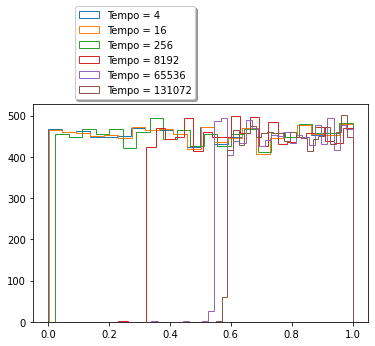

In [3]:
N = 10000
fitness = np.random.rand(N)

#T = 2**np.arange(1,17,3)
T = 2**np.array([2,4,8,13,16,17])
#T=[2,128,1024,4096,8192]
for t in range(T[-1]+1):
    ind = np.where(fitness == np.min(fitness))[0]
    fitness[ind] = np.random.rand(1)
    fitness[(ind + 1)%N] = np.random.rand(1)
    fitness[ind - 1] = np.random.rand(1)
    if t in T:
        p.hist(fitness, bins = 'auto', histtype = 'step', label = 'Tempo = ' + str(t))
p.legend(loc='lower right', bbox_to_anchor=(0.5, 1.00), shadow=True)
p.show()


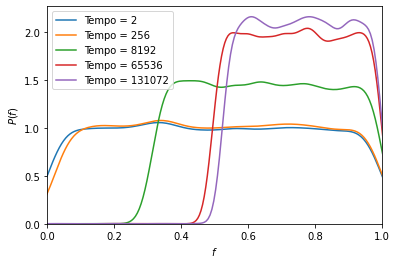

In [4]:
N = 10000
fitness = np.random.rand(N)

T = 2**np.array([1,8,13,16,17])

fmin = np.zeros(T[-1] + 1)
for t in range(T[-1]+1):
    minimum = np.min(fitness)
    i = int(np.where(fitness == minimum)[0])
    fitness[[(N+i-1)%N,i,(i+2)%N]] = np.random.rand(3)
    fmin[t] = minimum
    if t in T:
        seaborn.kdeplot(fitness, label = 'Tempo = '+ str(t))
p.xlabel(r'$f$')
p.ylabel(r'$P(f)$')
p.xlim(0,1)
p.legend()
#p.savefig('prob_f.jpg')
p.show()

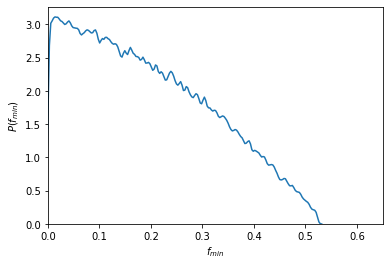

In [5]:

#p.hist(fmin, bins = 'auto', density = True, histtype = 'step')
seaborn.kdeplot(fmin, bw_method = 0.02)
p.xlabel(r'$f_{min}$')
p.ylabel(r'$P(f_{min})$')
p.xlim(0,0.65)
#p.savefig('fmin.jpg')
p.show()


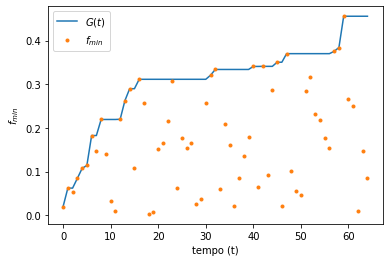

In [6]:


N = 50
fitness = np.random.rand(N)

T = 2**np.array([1,6])

fmin = np.zeros(T[-1] + 1)
G = np.zeros(T[-1] + 1)
for t in range(T[-1]+1):
    minimum = np.min(fitness)
    ind = int(np.where(fitness == minimum)[0])
    fitness[[(N+ind-1)%N,ind,(ind+2)%N]] = np.random.rand(3)
    fmin[t] = minimum
    G[t] = np.max(fmin)

p.plot(G, label = r'$G(t)$')
p.plot(fmin,'.', label = r'$f_{min}$')
p.xlabel('tempo (t)')
p.ylabel(r'$f_{min}$')
p.legend()

#p.savefig('gapfunc.jpg')
p.show()



[59]


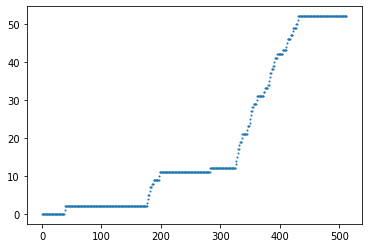

In [7]:
N = 100
fitness = np.random.rand(N)

T = 2**np.array([1,9])

fmin = np.zeros(T[-1] + 1)
n = 0
matriz = np.zeros((len(fmin),N))
num = np.zeros(len(fmin))
for t in range(T[-1]+1):
    minimum = np.min(fitness)
    ind = int(np.where(fitness == minimum)[0])
    f0 = np.copy(fitness)
    fitness[[(N+ind-1)%N,ind,(ind+2)%N]] = np.random.rand(3)
    v = np.where(fitness != f0)[0]
    matriz[t:,v] += 1


col = np.where(matriz[-1] == np.max(matriz[-1]))[0]
print(col)    
p.scatter(np.arange(T[-1]+1),matriz[:,col], s = 1 )

Text(0, 0.5, 'Nº de alterações')

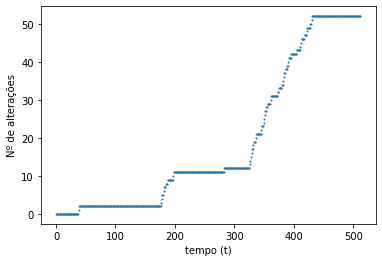

In [8]:
p.scatter(np.arange(T[-1]+1),matriz[:,col], s = 1 )
p.xlabel('tempo (t)')
p.ylabel('Nº de alterações')
#p.savefig('nalt.jpg')

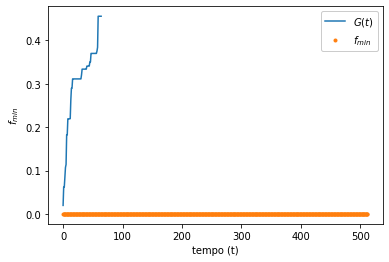

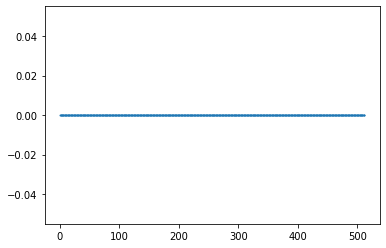

In [9]:
p.plot(G, label = r'$G(t)$')
p.plot(fmin,'.', label = r'$f_{min}$')
p.xlabel('tempo (t)')
p.ylabel(r'$f_{min}$')
p.legend(framealpha = 1)

#p.savefig('gapfunc.jpg')
p.show()
    
p.scatter(np.arange(T[-1]+1),num, s = 1 )


# Obter expoentes críticos com ajustes 

## Plot de $(1-f_0)/<n_{cov}> $ vs $f_0$ 

perto do ponto crítico $f_c$, $\gamma$ pode ser obtido pela equação $$\gamma = \lim_{f_0\rightarrow f_c}\frac{<n_{cov}>_{f_0}(f_c-f_0)}{1-f_0}$$
podemos representar esta equação da forma 
$$\frac{1-f_0}{<n_{cov}>_{f_0}} \approx \frac{(f_c-f_0)}{\gamma}$$
Representando, para cada $f_0$, a quantidade $\frac{1-f_0}{<n_{cov}>_{f_0}}$, obtemos uma curva com declive $1/\gamma$ e ordenada na origem $f_c$. Isto corresponde a medir a quantidade de pontos atualizados $<n_{cov}>$ para cada $f_0$ 


In [52]:
1/0.47

2.127659574468085

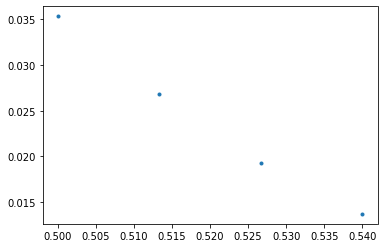

In [105]:
N = 10000
fitness = np.random.rand(N)
npontos = 4
TEMPO = 1000
F0 = np.linspace(0.50,0.54,npontos)
final = np.zeros(npontos)
j = 0

#evoluir o sistema até ao ponto crítico
for t in range(2**17):   

    minimum = np.min(fitness)
    i = int(np.where(fitness == minimum)[0])
    fitness[[(N+i-1)%N,i,(i+2)%N]] = np.random.rand(3)

    
for f0 in F0:
    fitt = np.zeros(N)
    ncov = np.zeros(0)
    v = np.where(fitness <= f0)[0]
    for t in range(TEMPO):
        
        #atualizar até todos os valores forem maiores do que f0
        while len(v) != 0:
            minimum = np.min(fitness)
            i = int(np.where(fitness == minimum)[0])
            fitness[[(N+i-1)%N,i,(i+2)%N]] = np.random.rand(3)
            v = np.where(fitness <= f0)[0]
        
        #atualizar até haver pelo menos um valor menor do que f0
        while len(v) == 0:
            minimum = np.min(fitness)
            i = int(np.where(fitness == minimum)[0])
            fitness[[(N+i-1)%N,i,(i+2)%N]] = np.random.rand(3)
            v = np.where(fitness <= f0)[0]
        
        #tirar dados de uma avalanche
        while(len(v) != 0): 
            fitt[v] = 1
            minimum = np.min(fitness)
            i = int(np.where(fitness == minimum)[0])
            fitness[[(N+i-1)%N,i,(i+2)%N]] = np.random.rand(3)
            v = np.where(fitness <= f0)[0]
            
        ncov = np.copy(np.concatenate([ncov,[fitt.sum()]]))
        fitt = np.zeros(N)
    final[j] = ncov[np.nonzero(ncov)[0]].mean()
    j += 1
    

p.plot(F0,(1-F0)/(final),'.')
        


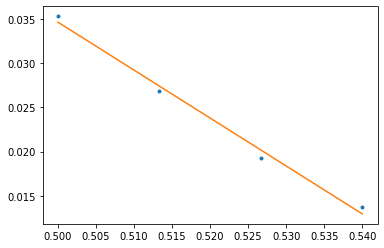

-1.8405380266613824
-0.166434503468565


In [106]:
from scipy.optimize import curve_fit

def f(x,a,b):
    return a*x + b
y = (1-F0)/(final)
popt, pcov = curve_fit(f,F0,y)
a = popt[0]
b = popt[1]
p.plot(F0,(1-F0)/(final),'.')
p.plot(F0,f(F0,a,b))
p.show()
print(1/a)
print(b*a)

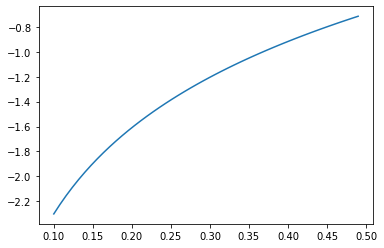

In [71]:
p.plot(np.linspace(0.1,0.49),np.log(np.linspace(0.1,0.49)))

## Obtenção de $D$

Representando S em função de R (fazendo uma média)

In [18]:
N = 10000
fitness = np.random.rand(N)
npontos = 4
TEMPO = 10000
F0 = np.linspace(0.1,0.49,npontos)
final = np.zeros(npontos)
j = 0
R = np.zeros(TEMPOS)
S = np.zeros(TEMPOS)

#evoluir o sistema até ao ponto crítico
for t in range(2**18):   

    minimum = np.min(fitness)
    i = int(np.where(fitness == minimum)[0])
    fitness[[(N+i-1)%N,i,(i+2)%N]] = np.random.rand(3)

    
for f0 in F0:
    fitt = np.zeros(N)
    ncov = np.zeros(0)
    v = np.where(fitness <= f0)[0]
    for t in range(TEMPO):
        
        #atualizar até todos os valores forem maiores do que f0
        while len(v) != 0:
            minimum = np.min(fitness)
            i = int(np.where(fitness == minimum)[0])
            fitness[[(N+i-1)%N,i,(i+2)%N]] = np.random.rand(3)
            v = np.where(fitness <= f0)[0]
        
        #atualizar até haver pelo menos um valor menor do que f0
        while len(v) == 0:
            minimum = np.min(fitness)
            i = int(np.where(fitness == minimum)[0])
            fitness[[(N+i-1)%N,i,(i+2)%N]] = np.random.rand(3)
            v = np.where(fitness <= f0)[0]
        
        #tirar dados de uma avalanche
        while(len(v) != 0): 
            fitt[v] = 1
            minimum = np.min(fitness)
            i = int(np.where(fitness == minimum)[0])
            fitness[[(N+i-1)%N,i,(i+2)%N]] = np.random.rand(3)
            v = np.where(fitness <= f0)[0]
            
        ncov = np.copy(np.concatenate([ncov,[fitt.sum()]]))
        fitt = np.zeros(N)
    final[j] = ncov[np.nonzero(ncov)[0]].mean()
    j += 1
    

p.plot(F0,(1-F0)/(final),'.')


array([0, 1, 3, 4])

# Bonequinhos Giros

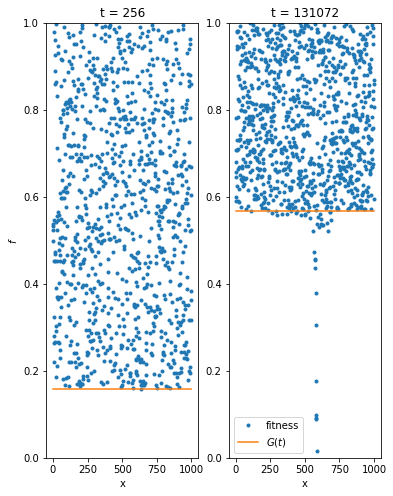

In [97]:
fig, ax  = p.subplots(ncols = 2, nrows = 1, figsize = (6,8))

N = 1000
fitness = np.random.rand(N)

T = 2**np.array([8,17])

fmin = np.zeros(T[-1] + 1)
G = np.zeros(T[-1] + 1)
ii = 0
for t in range(T[-1]+1):
    minimum = np.min(fitness)
    ind = int(np.where(fitness == minimum)[0])
    fitness[[(N+ind-1)%N,ind,(ind+2)%N]] = np.random.rand(3)
    fmin[t] = minimum
    G[t] = np.max(fmin)
    if t in T:
        ax[ii].plot(fitness, '.', label = 'fitness')
        ax[ii].plot(np.ones(len(fitness))*G[t], label = r'$G(t)$')
        ax[ii].set_title('t = ' + str(t))
        ax[ii].set_xlabel('x')
        if ii == 0:
            ax[ii].set_ylabel(r'$f$')
        ax[ii].set_ylim(0,1)
        ii += 1


p.legend()
p.savefig('img_il.png')
p.show()